In [ ]:
'''
Code for understanding and plotting MTS (and maybe later FM) spectrscopy photodiode signals
for optimisation and set up purposes. 

Follow https://arxiv.org/pdf/0805.2708 for MTS
Try and make code for Rb and Cs later
'''

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [3]:
#Constants to b added here

gamma = 1 #to be given by Steck for Rb and Cs
C = 1 #indpendednt parameters to be modelled
delta = 1
t= 1 
phi = 0


In [4]:
def L_n(n,Delta,omega_m):
    a = (Delta-n*omega_m)
    return gamma**2/(gamma**2 + a**2)

def D_n(n,Delta,omega_m):
    a = (Delta-n*omega_m)
    return gamma*a/(gamma**2 + a**2)

def Beat(omega_m, Delta): #Consider only carrier and first order sidebands
    Bess_0 = scipy.special.jv(0,delta)
    Bess_1 = scipy.special.jv(1,delta)
    term_0 = (C/np.sqrt(gamma**2 + omega_m**2))*Bess_0*Bess_1
    term_1 = (L_n(-1,Delta,omega_m) - L_n(-1/2,Delta,omega_m) + 
              L_n(1/2,Delta,omega_m) - L_n(1,Delta,omega_m))*np.cos(omega_m*t+phi)
    term_2 = (D_n(-1,Delta,omega_m) - D_n(-1/2,Delta,omega_m) - 
              D_n(1/2,Delta,omega_m) + D_n(1,Delta,omega_m))*np.sin(omega_m*t+phi)
    return term_1, term_2, term_0*(term_1 + term_2)

(np.float64(-0.166246863344043), np.float64(-0.3883712237574907), np.float64(-0.13205513165385993))


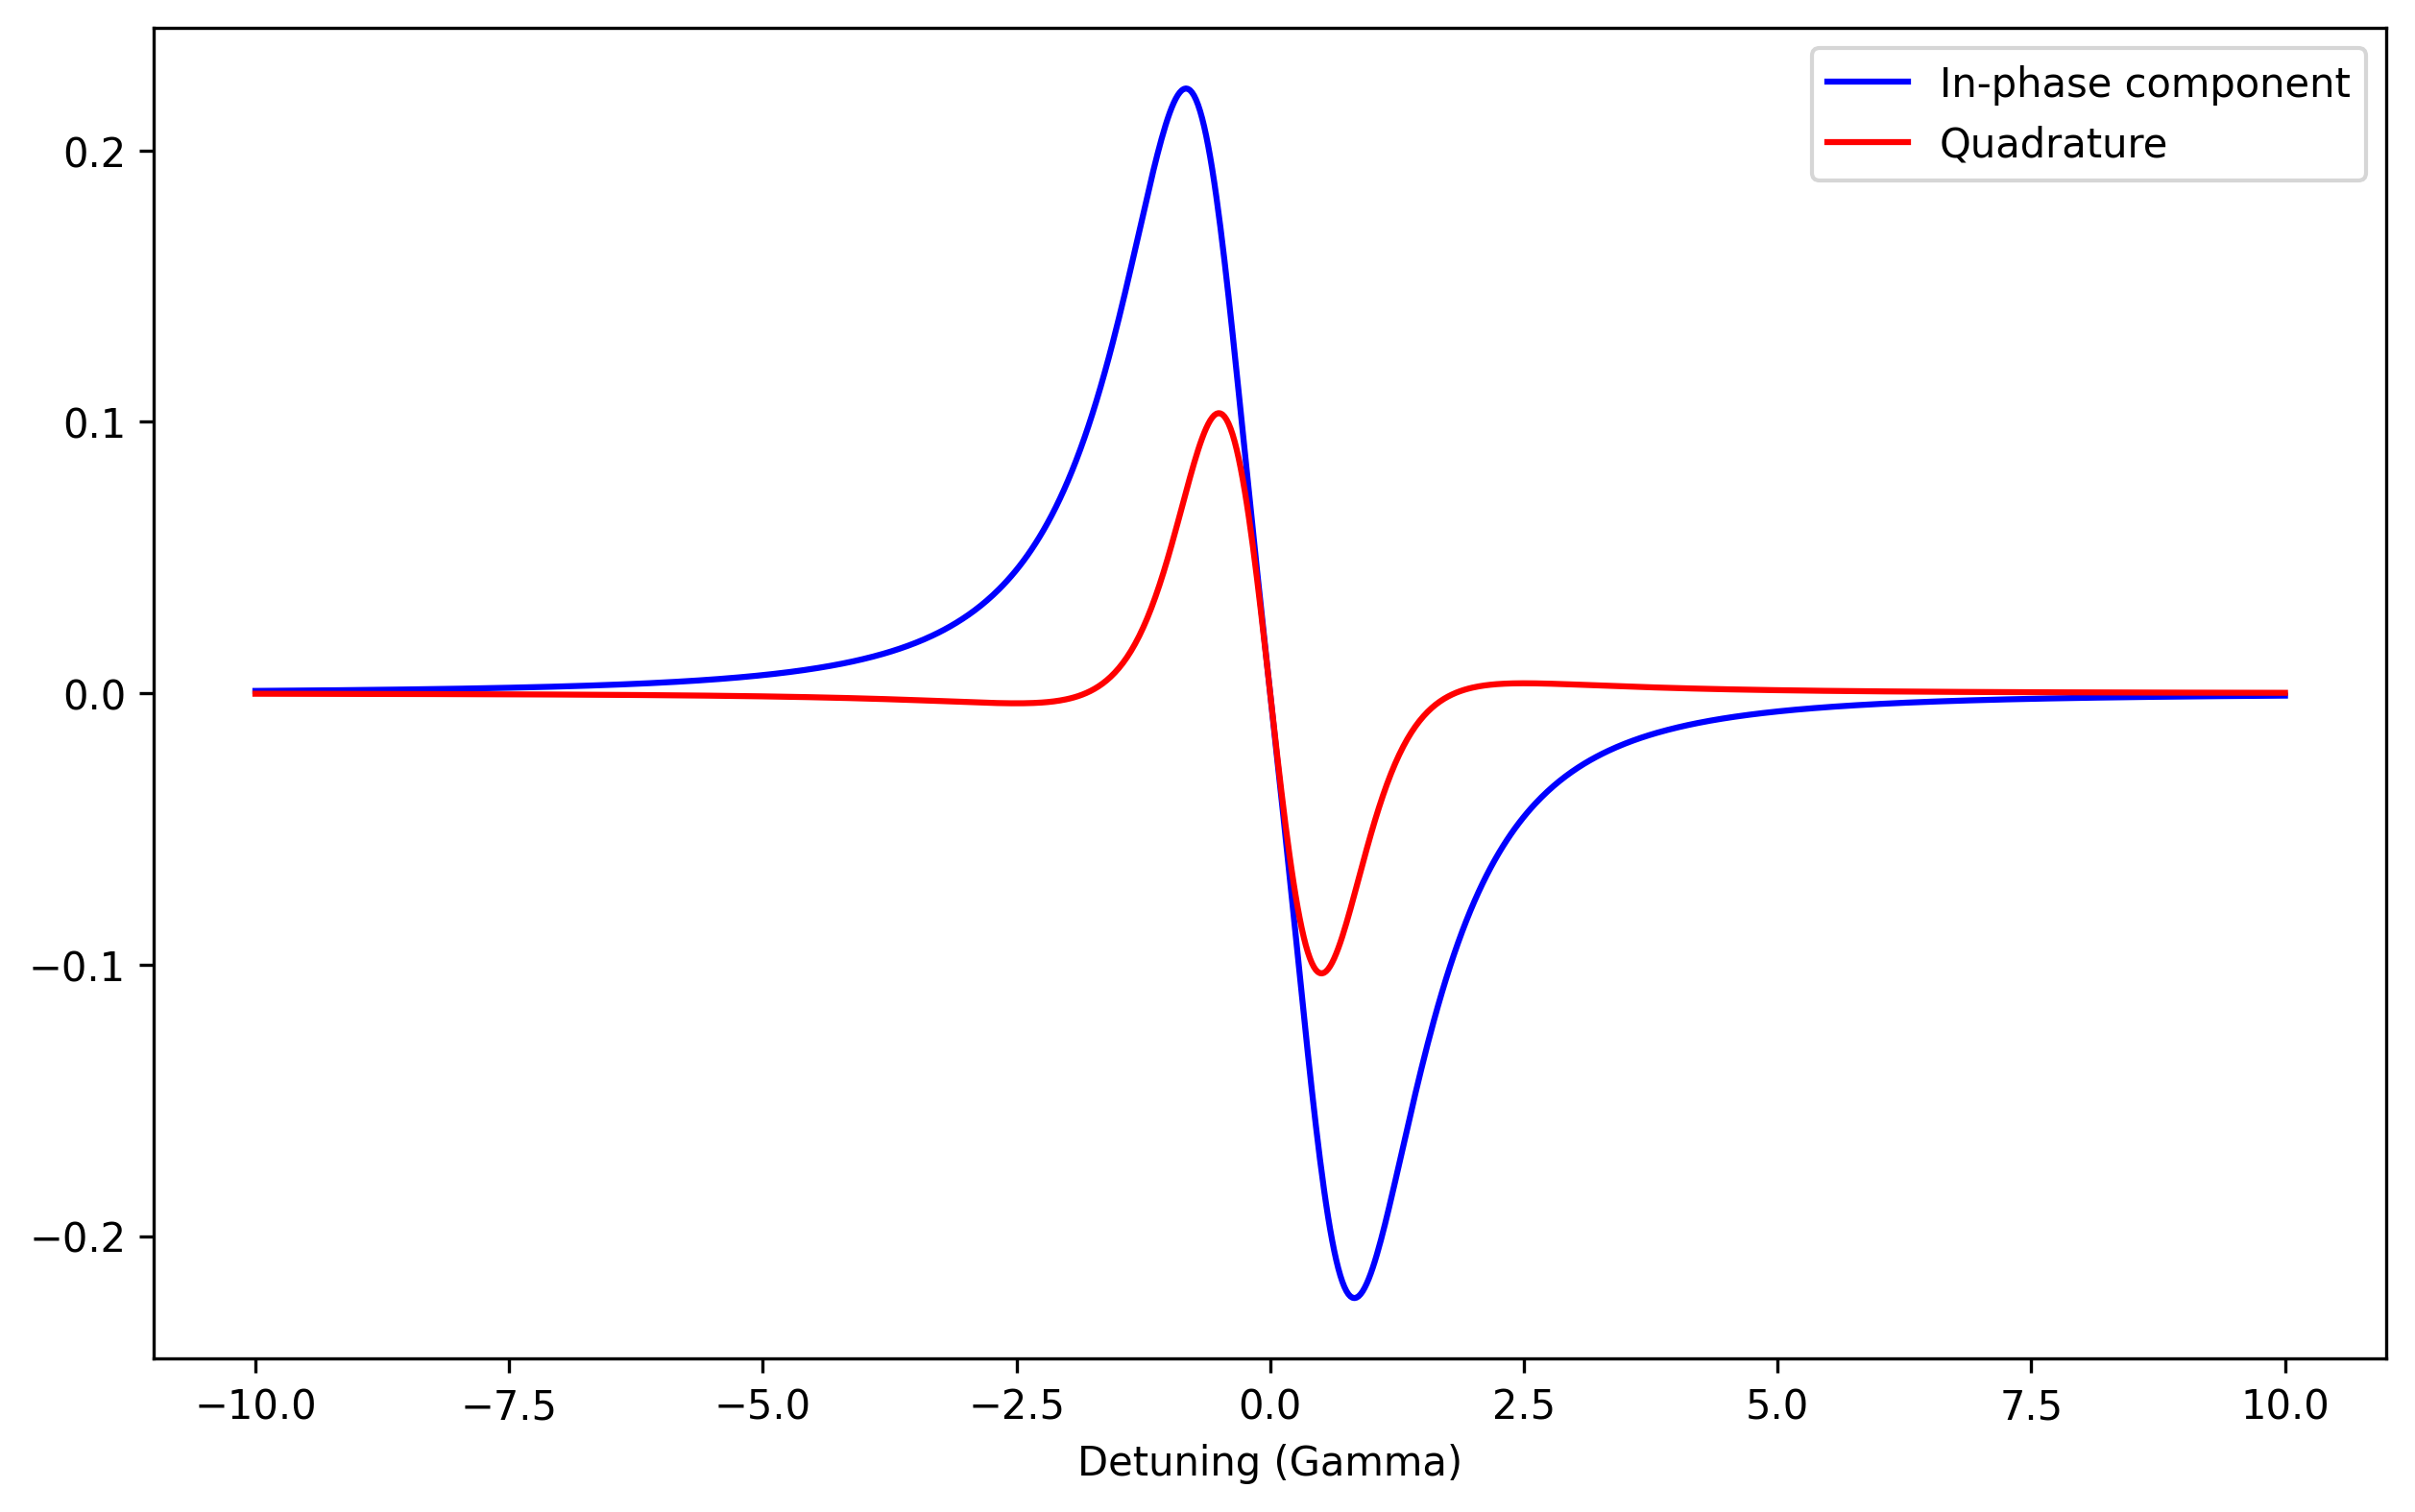

In [ ]:
print(Beat(1,1))

Delta_array = np.linspace(-10,10,1000)
plot = plt.figure(figsize=(10, 6),dpi =300)
omega = 0.5
plt.plot(Delta_array, Beat(omega,Delta_array)[0], label='In-phase component', color='blue')
plt.plot(Delta_array, Beat(omega,Delta_array)[1], label='Quadrature', color='red')

plt.legend()
plt.xlabel('Detuning (Gamma)')
plt.ylabel('Relative amplitude')
plt.show()

In [ ]:
#Normalised gradient plot

In [ ]:
#Normalised amplitude plot 